In [2]:
import dm_event
import time

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams.update({'font.size': 20})

In [3]:
from lindhard import *

# Upper Limits in DM-Nucleon cross section

We want to set the upper limits of a given Silicon detector experiment on the DM-Nucleon interaction. We can simulate the events for a 1kg-year of collected data. We first need to especify the characteristics of the signal and detector. In this case we are creating a Silicon detector ($N_{p}=N_{n}=14$) and a dark matter particle with $m_{\chi}=0.6$ GeV and $\sigma_{n}=10^{-41}$ cm$^{-2}$. The signal efficiency reconstruction is 100$\%$.



In [4]:
dm2 = dm_event.dm_event(14, 14, 0.6, 10**-41, 1, 365, True, Eemin=1e-10, eff=1)


We can now set the upper limits with a $95\%$ Confidence Level. To do so, we generate a random background of events with $0.1$ dru, a background efficiency reconstruction threshold of $0.04$ keV$_{ee}$, a signal reconstruction resolution of $\sigma_{res}=0.004$ keV$_{ee}$ and a signal efficiency reconstruction threshold of $0.04$ keV$_{ee}$.

-35.11328125


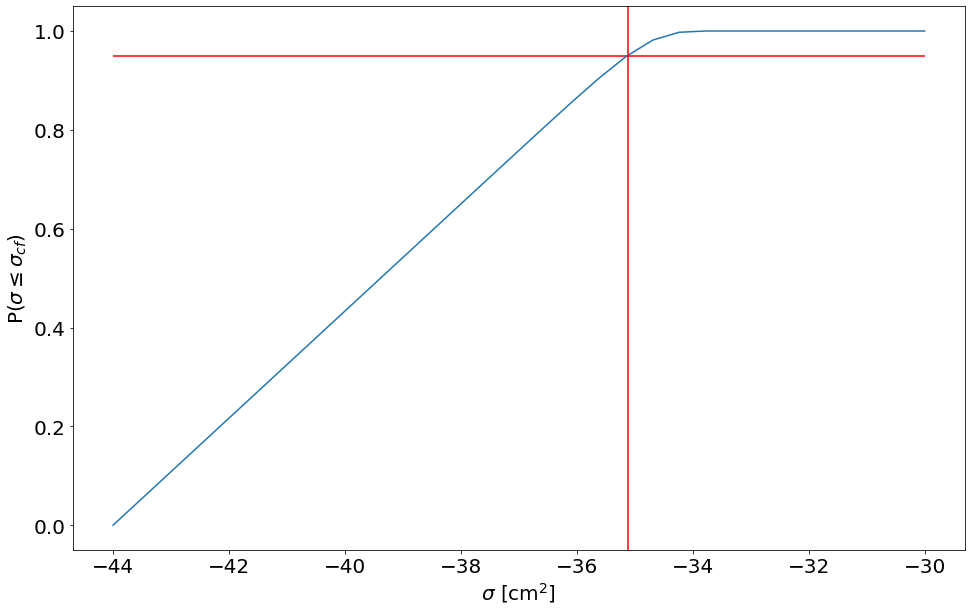

Number of Signal events:  0
Number of Background events:  278
Upper Limit Cross Section:  -35.11328125
Cross section for Sigma0 = 4e-3:  7.704043920109091e-36


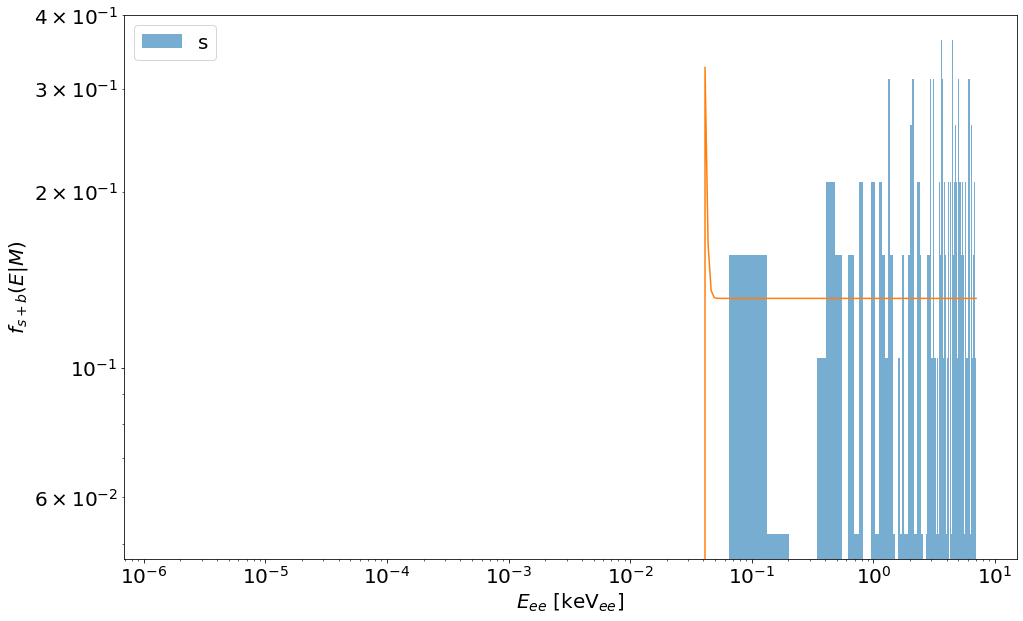

In [8]:
dm2.upper_limit(cf=0.95, bkg_pars = [0.1, 4e-2], x0=[-35,248], sigma_res_Ee=4e-3, sigma_Ee = 4e-2, bounds = [(-44,-30), (0,1e6)], plot=True)

### We rewrite the input cross section with the obtained from the upper limit
dm2.cross_section = 10**dm2.cross_section_95
### The recalculate the signal pdfs
dm2.normalization_signal()
dm2.verbose()

### Plots the s+b pdfs and the histogram with the simulated events.
plt.hist(dm2.events, bins = 100, density=True, label = "s",alpha=0.6)
print("Cross section for Sigma0 = 4e-3: ", dm2.cross_section)
dm2.plot_var("fsb", step = 300)
plt.loglog()
plt.legend(loc="best")
plt.show()

If we now the reconstruction efficiency curves we can use them instead of an square function.

0.01 0.01
0.04 0.04
0.00018011 0.00018011


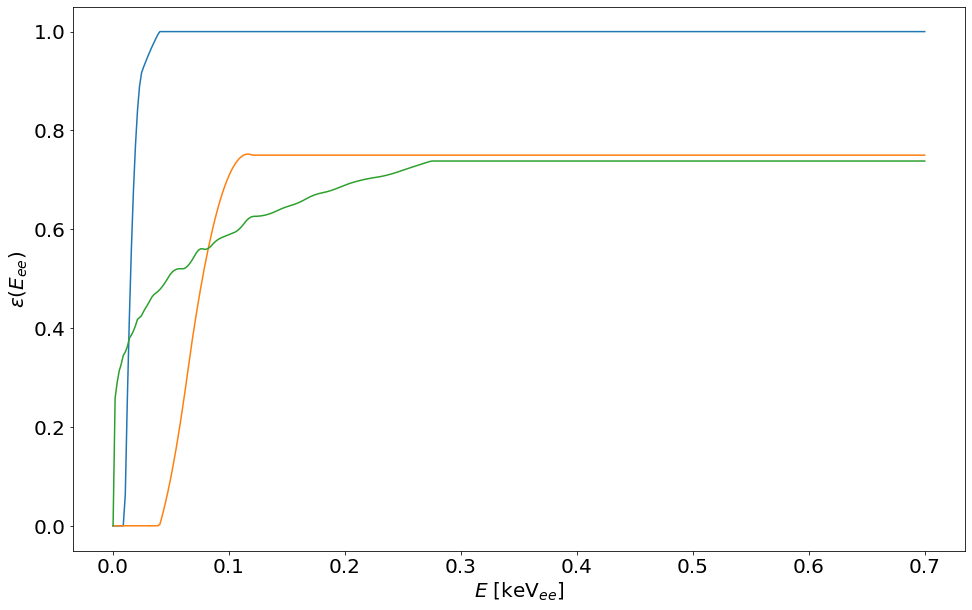

In [9]:
dm2 = dm_event.dm_event(14, 14, 1, 10**-43, 1, 365, True, Eemin=1e-5, sigma_Ee = 4e-5, sigma_res_Ee=4e-2, eff=1)
dm2.efficiency("efficiency_Compton.csv", plot=True)
dm2.efficiency("efficiency_DAMIC.csv", plot=True)
dm2.efficiency("eff_DAMIC_paper.csv", plot=True)

We can also calculate the projected discovery of a signal+background data. We simulate a signal with $m_{\chi}=5$ GeV and $\sigma_{n}=10^{-42}$ cm$^{-2}$. For 1 kg-year of data and signal an background efficiency threshold of $0.02$ keV$_{ee}$ and a signal resolution of $0.006$ keV$_{ee}$.

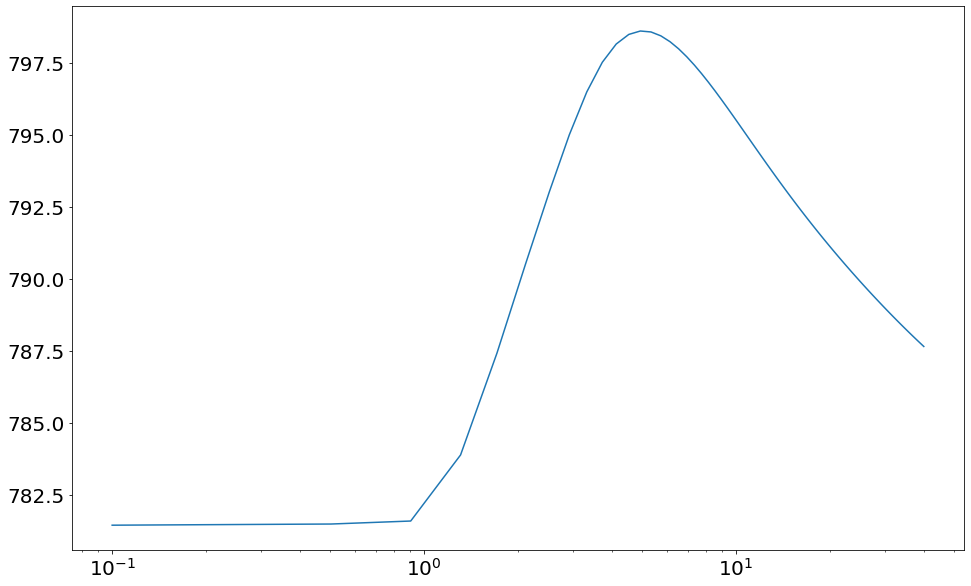

100%|██████████| 5000/5000 [53:00<00:00,  1.57it/s]


95th percentil:  3.473060834074159e-42
Central vlue:  1.2224227249169661e-42
5th percentile:  7.163590608739206e-43
95th percentil:  28.918480074458788
Central vlue:  6.165362668860137
5th percentile:  3.8966368881941946
95th percentil:  286.87609828616775
Central vlue:  253.5769794141711
5th percentile:  192.6872029648349
[-41.92984078   5.14079313 258.73320451]


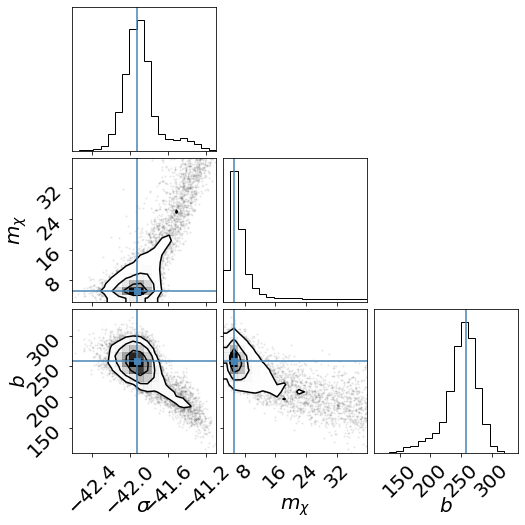

In [12]:
dm2 = dm_event.dm_event(14, 14, 5, 10**-42, 1, 365, True, Eemin=1e-5, sigma_Ee = 2e-2, sigma_res_Ee=6e-3, eff=1)
dm2.projected_discovery([0.1, 2e-2], x0=[-42,5,300], bounds = [(-44,-35), (0.1,40),(1,1e6)], plot = True)

Another example with $m_{\chi} = 10$ GeV, $\sigma_{n}=10^{-42}$ cm$^{2}$ and different reconstruction efficiency parameters.

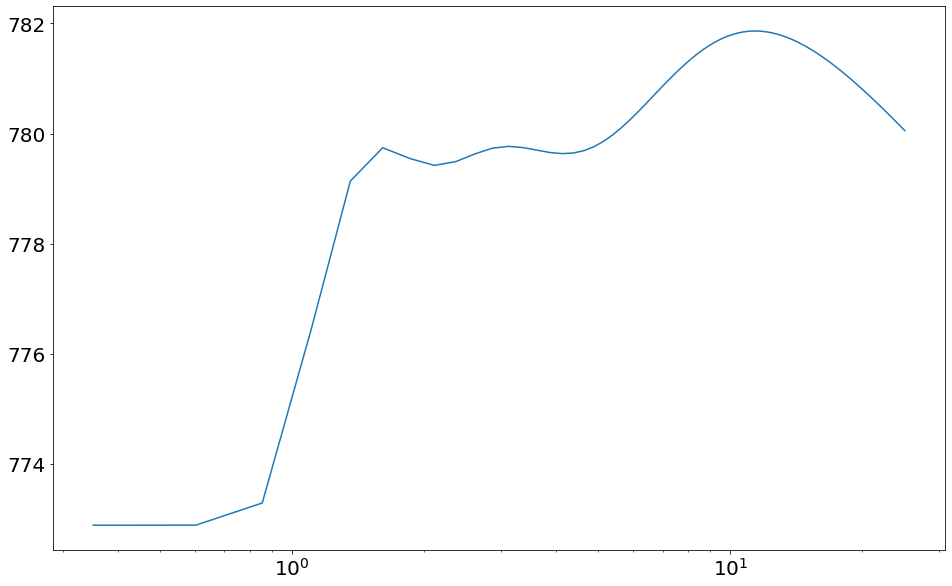

/home/alantero/repositories/DAMIC_DM_Sensitive_Region/likelihood.py:85: RuntimeWarning: invalid value encountered in true_divide
  fs[Er>lindhard_inv(sigma_Ee)] = dR[Er>lindhard_inv(sigma_Ee)]/C_sigma0
100%|██████████| 5000/5000 [57:29<00:00,  1.45it/s]    


95th percentil:  1.3813312638972003e-42
Central vlue:  6.114142556838494e-43
5th percentile:  9.258300675846817e-44
95th percentil:  14.598830519816223
Central vlue:  10.85611465549222
5th percentile:  4.298658376191831
95th percentil:  297.5847247737772
Central vlue:  262.7147541419513
5th percentile:  227.12762787227183
[-42.20613611   3.36333397 275.18686202]


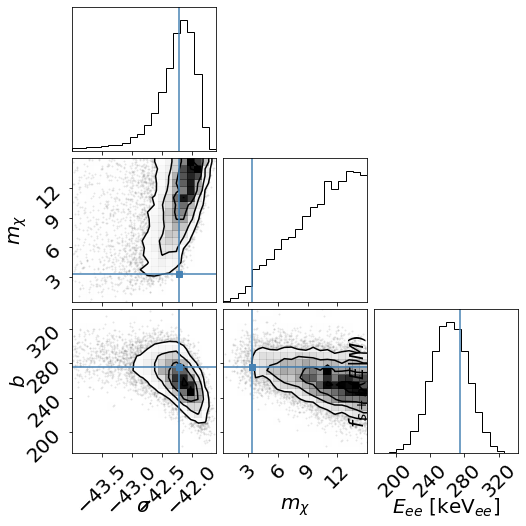

In [7]:
dm2 = dm_event.dm_event(14, 14, 10, 10**-42, 1, 365, True, Eemin=1e-5, sigma_Ee = 2e-2, sigma_res_Ee=4e-4, eff=1)
dm2.projected_discovery([0.1, 2e-2], x0=[-42,5,300], bounds = [(-44,-35), (0.1,25),(1,1e6)], plot = True)
plt.hist(dm2.bkg_ev, bins = 100, density=True, label = r"$\sigma_0 = 4e-2$",alpha=0.6)
dm2.plot_var("fsb")

# Theoretical Model (No signal efficiency and nuclear recoils energy)

The same calculations can be done with only the theoretical model (nuclear recolis units and signal reconstruction efficiencies.)

In [32]:
dm_t = dm_event.dm_event(14, 14, 5, 3e-42, 1, 365, False)

In [33]:
start_time = time.time()
dm_events = dm_t.simul_ev(0.1,4e-4)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.9017531871795654 seconds ---


Number of Signal events:  79
Number of Background events:  243


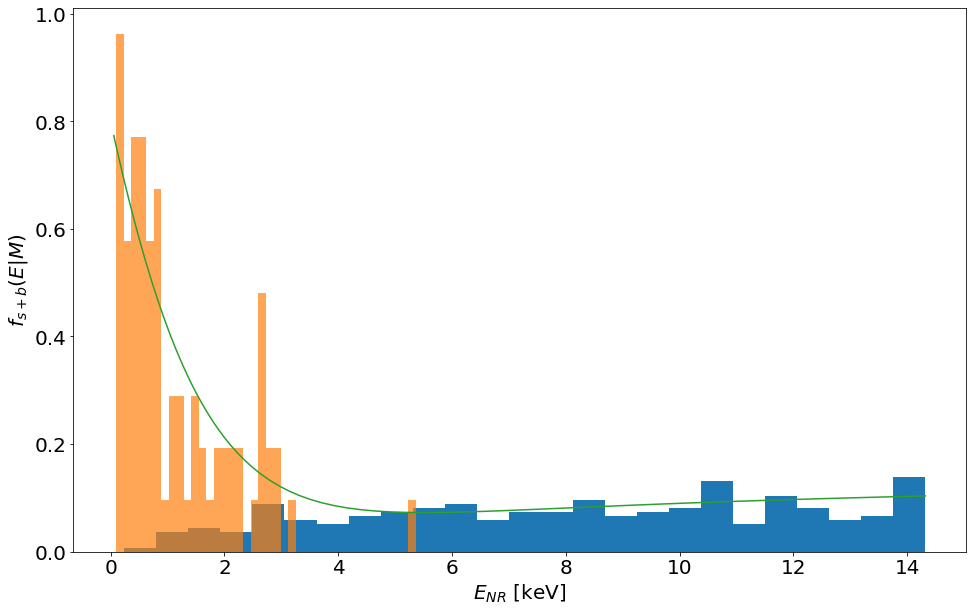

In [34]:
dm_t.verbose()
plt.hist(dm_t.bkg_ev, bins = 25, density=True)
plt.hist(dm_t.signal_ev, bins = 40, density=True, alpha = 0.7)

dm_t.plot_var("fsb")

# Upper Limits

To calculate the upper limits we perform do the same as before but over different samples of background at the different mass points.

In [57]:
xs2 = []
n_sample = 10
start_time = time.time()

for i in range(n_sample):
    print("{} event".format(i))
    dm2 = dm_event.dm_event(14, 14, 2, 10**-39, 1, 365, True, Eemin=1e-5, eff = 1)
    dm2.upper_limit(cf=0.95, bkg_pars = [0.1, 4e-2], x0=[-42,300], sigma_res_Ee=4e-3, bounds = [(-50,-30), (1,1e6)], sigma_Ee_b=4e-2, sigma_Ee=4e-2, plot=False)
    #dm2.verbose()
    xs2.append(dm2.cross_section_95)
    print(dm2.cross_section_95)

print("--- %s seconds ---" % (time.time() - start_time))
xs2 = np.array(xs2)

0 event
-42.7734375
-42.7734375
1 event
-42.1484375
-42.1484375
2 event
-42.3828125
-42.3828125
3 event
-42.7734375
-42.7734375
4 event
-42.7734375
-42.7734375
5 event
-42.9296875
-42.9296875
6 event
-41.8359375
-41.8359375
7 event
-42.3046875
-42.3046875
8 event
-41.8359375
-41.8359375
9 event
-42.6953125
-42.6953125
--- 214.03866863250732 seconds ---


In [58]:
xs3 = []
n_sample = 10
start_time = time.time()

for i in range(n_sample):
    print("{} event".format(i))
    dm3 = dm_event.dm_event(14, 14, 3, 10**-39, 1, 365, True, Eemin=1e-5, eff = 1)
    dm3.upper_limit(cf=0.95, bkg_pars = [0.1, 4e-2], x0=[-42,300], sigma_res_Ee=4e-3, bounds = [(-50,-30), (1,1e6)], sigma_Ee_b=4e-2, sigma_Ee=4e-2, plot=False)
    #dm2.verbose()
    xs3.append(dm3.cross_section_95)

print("--- %s seconds ---" % (time.time() - start_time))
xs3 = np.array(xs3)
print(10**(np.median(xs3)+np.std(xs3)))
print(10**np.median(xs3))
print(10**(np.median(xs3)-np.std(xs3)))

0 event
-42.5390625
1 event
-43.0859375
2 event
-42.7734375
3 event
-43.0859375
4 event
-43.1640625
5 event
-43.1640625
6 event
-42.2265625
7 event
-42.5390625
8 event
-42.8515625
9 event
-43.0859375
--- 206.1422402858734 seconds ---
2.186850155562493e-43
1.0746078283213176e-43
5.280572067327722e-44


In [59]:
xs4 = []
n_sample = 10
start_time = time.time()

for i in range(n_sample):
    print("{} event".format(i))
    dm4 = dm_event.dm_event(14, 14, 4, 10**-39, 1, 365, True, Eemin=1e-5, eff = 1)
    dm4.upper_limit(cf=0.95, bkg_pars = [0.1, 4e-2], x0=[-42,300], sigma_res_Ee=4e-3, bounds = [(-50,-30), (1,1e6)], sigma_Ee_b=4e-2, sigma_Ee=4e-2, plot=False)
    #dm2.verbose()
    xs4.append(dm4.cross_section_95)

print("--- %s seconds ---" % (time.time() - start_time))
xs4 = np.array(xs4)
print(10**(np.median(xs4)+np.std(xs4)))
print(10**np.median(xs4))
print(10**(np.median(xs4)-np.std(xs4)))

0 event
-41.9921875
1 event
-43.0859375
2 event
-43.0078125
3 event
-42.6171875
4 event
-42.2265625
5 event
-43.2421875
6 event
-42.7734375
7 event
-43.3984375
8 event
-42.7734375
9 event
-43.3984375
--- 207.21822714805603 seconds ---
3.626827366651598e-43
1.2863969449369746e-43
4.562712620840735e-44


In [60]:
xs5 = []
n_sample = 10
start_time = time.time()

for i in range(n_sample):
    print("{} event".format(i))
    dm5 = dm_event.dm_event(14, 14, 5, 10**-39, 1, 365, True, Eemin=1e-5, sigma_Ee = 1e-2, sigma_res_Ee=4e-4, eff = 1)
    dm5.upper_limit(cf=0.95, bkg_pars = [0.1, 4e-2], x0=[-42,300], sigma_res_Ee=4e-3, bounds = [(-50,-30), (1,1e6)], sigma_Ee_b=4e-2, sigma_Ee=4e-2, plot=False)
    #dm2.verbose()
    xs5.append(dm5.cross_section_95)

print("--- %s seconds ---" % (time.time() - start_time))
xs5 = np.array(xs5)
print(10**(np.median(xs5)+np.std(xs5)))
print(10**np.median(xs5))
print(10**(np.median(xs5)-np.std(xs5)))

0 event
-43.0859375
1 event
-42.6953125
2 event
-42.6953125
3 event
-43.3203125
4 event
-43.2421875
5 event
-43.0859375
6 event
-43.3203125
7 event
-43.3984375
8 event
-43.3984375
9 event
-43.0078125
--- 209.6300871372223 seconds ---
1.2191567303502206e-43
6.853895838650082e-44
3.853145948968383e-44


In [61]:
xs1 = []
n_sample = 10
start_time = time.time()


for i in range(n_sample):
    print("{} event".format(i))
    dm1 = dm_event.dm_event(14, 14, 1, 10**-39, 1, 365, True, Eemin=1e-5, eff = 1)
    dm1.upper_limit(cf=0.95, bkg_pars = [0.1, 4e-2], x0=[-42,300], sigma_res_Ee=4e-3, bounds = [(-50,-30), (1,1e6)], sigma_Ee_b=4e-2, sigma_Ee=4e-2, plot=False)
    #dm1.upper_limit(bkg_pars = [0.1, 4e-4], x0=[-44,248], sigma_res_Ee=4e-4, bounds = [(-44,-36), (0,1e6)], sigma_Ee_b=4e-6, sigma_Ee=4e-6, plot=False)
    #dm_events = dm1.simul_ev(0.1,4e-4)
    #dm2.likelihood(deltaLL = True, sigmaEe_b = 4e-3)
    #dm1.upper_limit(bkg_pars = [0.1, 4e-4], bounds = [(-44,-38), (0,1e6)])
    #dm2.verbose()
    xs1.append(dm1.cross_section_95)

print("--- %s seconds ---" % (time.time() - start_time))
xs1 = np.array(xs1)
print(10**(np.median(xs1)+np.std(xs1)))
print(10**np.median(xs1))
print(10**(np.median(xs1)-np.std(xs1)))

0 event
-39.1015625
1 event
-39.9609375
2 event
-39.9609375
3 event
-40.0390625
4 event
-40.0390625
5 event
-40.0390625
6 event
-40.0390625
7 event
-40.0390625
8 event
-40.0390625
9 event
-40.0390625
--- 205.83956241607666 seconds ---
1.732581111922379e-40
9.139816994654905e-41
4.82149171088996e-41


In [62]:
xs05 = []
n_sample = 10
start_time = time.time()

for i in range(n_sample):
    print("{} event".format(i))
    dm05 = dm_event.dm_event(14, 14, 0.5, 10**-39, 1, 365, True, Eemin=1e-5, sigma_Ee = 4e-2, sigma_res_Ee=4e-3, eff = 1)
    dm05.upper_limit(cf=0.95, bkg_pars = [0.1, 4e-2], x0=[-42,300], sigma_res_Ee=4e-3, bounds = [(-50,-30), (1,1e6)], sigma_Ee_b=4e-2, sigma_Ee=4e-2, plot=False)
    #dm2.verbose()
    xs05.append(dm05.cross_section_95)

print("--- %s seconds ---" % (time.time() - start_time))
xs05 = np.array(xs05)
print(10**(np.median(xs05)+np.std(xs05)))
print(10**np.median(xs05))
print(10**(np.median(xs05)-np.std(xs05)))

0 event
-34.00390625
1 event
-32.63671875
2 event
-34.00390625
3 event
-34.00390625
4 event
-34.00390625
5 event
-32.59765625
6 event
-34.00390625
7 event
-33.26171875
8 event
-34.00390625
9 event
-34.00390625
--- 226.57370233535767 seconds ---
3.617234748912053e-34
9.91045856248861e-35
2.715256148314519e-35


In [63]:
xs10 = []
n_sample = 10
start_time = time.time()

for i in range(n_sample):
    print("{} event".format(i))
    dm10 = dm_event.dm_event(14, 14, 10, 10**-39, 1, 365, True, Eemin=1e-5, sigma_Ee = 1e-2, sigma_res_Ee=4e-4, eff = 1)
    dm10.upper_limit(cf=0.95, bkg_pars = [0.1, 4e-2], x0=[-42,300], sigma_res_Ee=4e-3, bounds = [(-50,-30), (1,1e6)], sigma_Ee_b=4e-2, sigma_Ee=4e-2, plot=False)
    #dm2.verbose()
    xs10.append(dm10.cross_section_95)

print("--- %s seconds ---" % (time.time() - start_time))
xs10 = np.array(xs10)
print(10**(np.median(xs10)+np.std(xs10)))
print(10**np.median(xs10))
print(10**(np.median(xs10)-np.std(xs10)))

0 event
-43.1640625
1 event
-42.9296875
2 event
-42.7734375
3 event
-42.7734375
4 event
-42.8515625
5 event
-43.1640625
6 event
-42.9296875
7 event
-42.7734375
8 event
-43.2421875
9 event
-43.2421875
--- 208.40981674194336 seconds ---
1.8139467910509386e-43
1.175743265920711e-43
7.62079810817935e-44


We can plot the mean and $\pm$ standard deviation contours to have an idea of the Sensitive region. We simulated n=10 samples of background for each mass point.

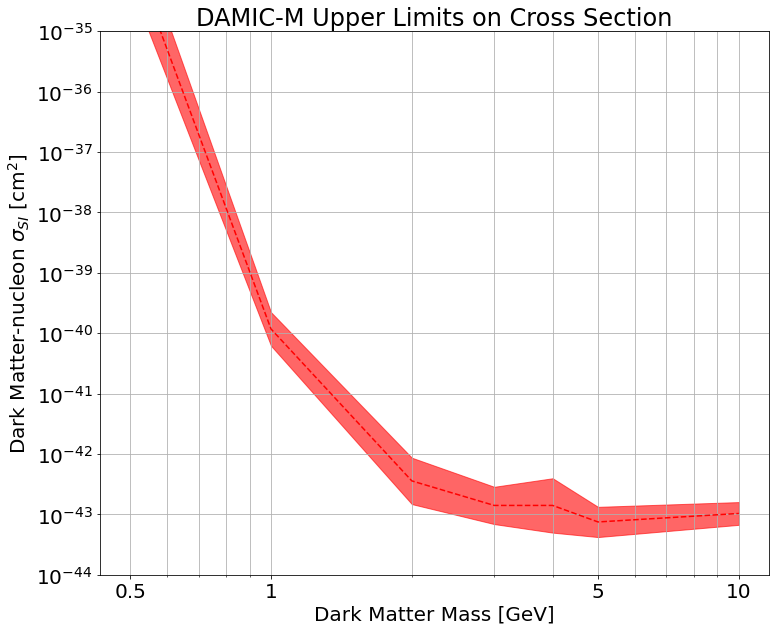

In [65]:
### Mass points
m = [0.5,1,2,3,4,5,10]

### Mean and std values
xs = np.array([np.mean(xs05),np.mean(xs1),np.mean(xs2),np.mean(xs3),np.mean(xs4),np.mean(xs5),np.mean(xs10)])
xs_std = np.array([np.std(xs05),np.std(xs1),np.std(xs2),np.std(xs3),np.std(xs4),np.std(xs5),np.std(xs10)])

### Plot
plt.plot(m,10**xs,'--', color = "r")
plt.fill_between(m, 10**(xs-xs_std), 10**(xs+xs_std), label=r"$\pm 1\sigma$", alpha = 0.6, color = "r")
plt.ylim(1e-45,1e-35)
plt.xlabel(r"Dark Matter Mass [GeV]")
plt.ylabel(r"Dark Matter-nucleon $\sigma_{SI}$ [cm$^2$]")
plt.title("DAMIC-M Upper Limits on Cross Section")
plt.yscale("log")
plt.xscale("log")
plt.ylim(1e-44,1e-35)
plt.xticks([0.5,1,5,10], [0.5,1,5,10])
plt.yticks([10**i for i in range(-44,-34)], [r"$10^{"+str(i)+"}$" for i in range(-44,-34)])
plt.grid(True, 'both')

